In [19]:
import pandas as pd
train=pd.read_csv('train.csv')
train=train.drop(['RowNumber','CustomerId','Surname'],axis=1)
test=pd.read_csv('test.csv')
test=test.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [20]:
print(len(train))
print(len(test))

8000
2000


## 特徵工程

(-1.0, 5.0)

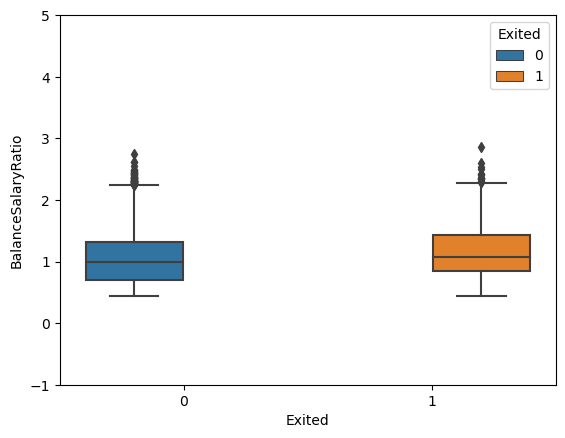

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
train['BalanceSalaryRatio'] = train.Balance/train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = train)
plt.ylim(-1, 5)

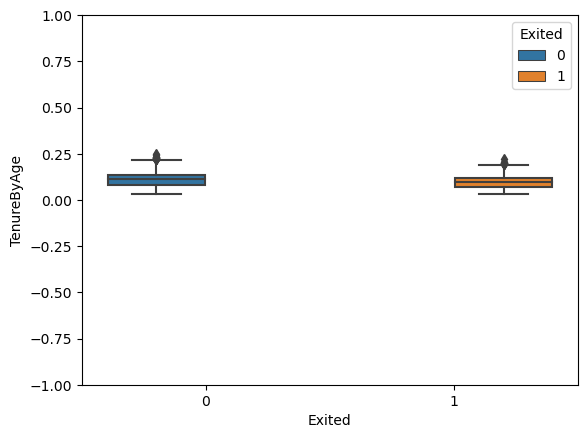

In [22]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
train['TenureByAge'] = train.Tenure/(train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = train)
plt.ylim(-1, 1)
plt.show()

In [23]:
train['CreditScoreGivenAge'] = train.CreditScore/(train.Age)

In [24]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0,1.060186,0.131579,18.947368
1,682,France,Female,54,4,62397.41,1,1,0,113088.60,1,0.551757,0.074074,12.629630
2,672,France,Female,31,5,119903.67,1,1,1,132925.17,0,0.902039,0.161290,21.677419
3,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0,0.940469,0.100000,14.800000
4,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0,0.952596,0.119048,17.928571


## 資料前處理

In [25]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
train = train[['Exited'] + continuous_vars + cat_vars]
train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,0,720,38,5,114051.97,2,107577.29,1.060186,0.131579,18.947368,0,1,Spain,Male
1,1,682,54,4,62397.41,1,113088.60,0.551757,0.074074,12.629630,1,0,France,Female
2,0,672,31,5,119903.67,1,132925.17,0.902039,0.161290,21.677419,1,1,France,Female
3,0,592,40,4,104257.86,1,110857.33,0.940469,0.100000,14.800000,1,0,Spain,Female
4,0,753,42,5,120387.73,1,126378.57,0.952596,0.119048,17.928571,0,1,Spain,Male


In [26]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
train.loc[train.HasCrCard == 0, 'HasCrCard'] = -1
train.loc[train.IsActiveMember == 0, 'IsActiveMember'] = -1
train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,0,720,38,5,114051.97,2,107577.29,1.060186,0.131579,18.947368,-1,1,Spain,Male
1,1,682,54,4,62397.41,1,113088.60,0.551757,0.074074,12.629630,1,-1,France,Female
2,0,672,31,5,119903.67,1,132925.17,0.902039,0.161290,21.677419,1,1,France,Female
3,0,592,40,4,104257.86,1,110857.33,0.940469,0.100000,14.800000,1,-1,Spain,Female
4,0,753,42,5,120387.73,1,126378.57,0.952596,0.119048,17.928571,-1,1,Spain,Male


In [27]:
# One hot encode the categorical variables
import numpy as np
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (train[i].dtype == np.str or train[i].dtype == np.object):
        for j in train[i].unique():
            train[i+'_'+j] = np.where(train[i] == j,1,-1)
        remove.append(i)
train = train.drop(remove, axis=1)
train.head()

C:\Users\Karen\anaconda3\envs\AI_version1\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\Karen\anaconda3\envs\AI_version1\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Male,Gender_Female
0,0,720,38,5,114051.97,2,107577.29,1.060186,0.131579,18.947368,-1,1,1,-1,-1,1,-1
1,1,682,54,4,62397.41,1,113088.60,0.551757,0.074074,12.629630,1,-1,-1,1,-1,-1,1
2,0,672,31,5,119903.67,1,132925.17,0.902039,0.161290,21.677419,1,1,-1,1,-1,-1,1
3,0,592,40,4,104257.86,1,110857.33,0.940469,0.100000,14.800000,1,-1,1,-1,-1,-1,1
4,0,753,42,5,120387.73,1,126378.57,0.952596,0.119048,17.928571,-1,1,1,-1,-1,1,-1


In [28]:
# minMax scaling the continuous variables
minVec = train[continuous_vars].min().copy()
maxVec = train[continuous_vars].max().copy()
train[continuous_vars] = (train[continuous_vars]-minVec)/(maxVec-minVec)
train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Male,Gender_Female
0,0,0.892508,0.188679,0.6,0.409621,0.333333,0.589163,0.257297,0.463158,0.595089,-1,1,1,-1,-1,1,-1
1,1,0.768730,0.490566,0.4,0.000000,0.000000,0.654032,0.047066,0.202469,0.267236,1,-1,-1,1,-1,-1,1
2,0,0.736156,0.056604,0.6,0.456025,0.000000,0.887514,0.191905,0.597849,0.736763,1,1,-1,1,-1,-1,1
3,0,0.475570,0.226415,0.4,0.331954,0.000000,0.627770,0.207795,0.320000,0.379865,1,-1,1,-1,-1,-1,1
4,0,1.000000,0.264151,0.6,0.459864,0.000000,0.810459,0.212810,0.406349,0.542220,-1,1,1,-1,-1,1,-1


In [35]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[ continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

## Model fitting and selection

In [30]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [31]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [32]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(train.loc[:, train.columns != 'Exited'],train.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [33]:
print(classification_report(train.Exited,  RF.predict(train.loc[:, train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6368
           1       0.87      0.50      0.64      1632

    accuracy                           0.88      8000
   macro avg       0.88      0.74      0.78      8000
weighted avg       0.88      0.88      0.87      8000



## Test model prediction accuracy on test data

In [36]:
# Make the data transformation for test data
test = DfPrepPipeline(test,train.columns,minVec,maxVec)
test = test.mask(np.isinf(test))
test = test.dropna()
test.shape

(2000, 17)

In [39]:
pred=RF.predict(test.loc[:, test.columns != 'Exited'])

In [40]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
output=pd.read_csv('upload.csv')
output

,Unnamed: 0,RowNumber,Exited
0,0,2209,0
1,1,9924,0
2,2,4617,0
3,3,6077,0
4,4,9240,0
...,...,...,...
1995,1995,7872,0
1996,1996,4257,0
1997,1997,2273,0
1998,1998,315,0


In [42]:
output.Exited=pred
output

,Unnamed: 0,RowNumber,Exited
0,0,2209,0
1,1,9924,0
2,2,4617,0
3,3,6077,0
4,4,9240,0
...,...,...,...
1995,1995,7872,0
1996,1996,4257,0
1997,1997,2273,0
1998,1998,315,0


In [43]:
output.to_csv('upload2.csv', index=False)